# Autoencoder 

In [20]:
import sklearn.datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
digits = sklearn.datasets.load_digits()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=.1, random_state=27)

In [ ]:
X_train.shape, X_test.shape

In [2]:
from nn import nn, io, preprocess

In [ ]:
net = nn.NeuralNetwork(
    nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
               {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
    lr = 1e-3,
    seed = 27,
    batch_size=10,
    epochs=1000,
    loss_function="mse")

In [ ]:
train_losses, val_losses = net.fit(X_train, X_train, X_test, X_test)

In [ ]:
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
pred = net.predict(digits.data[0])
ax1.imshow(digits.data[0].reshape(8,8), vmin=4)
ax1.set_title("actual")
ax2.set_title("predicted")
ax2.imshow(pred.reshape(8,8), vmin=4)


# Transcription Factor Classifier

In [64]:
positives = io.read_text_file("./data/rap1-lieb-positives.txt")
negatives = io.read_fasta_file("./data/yeast-upstream-1k-negative.fa")

In [82]:
pos_length = len(positives[0])

negs_shortened = []
for seq in negatives:
    negs = [seq[i*pos_length:(i + 1)*pos_length] for i in range(len(seq) // pos_length)]
    negs_shortened.extend(negs)
neg_seqs = list(np.array(negs_shortened)[np.random.randint(len(negs_shortened), size=10000)])

In [83]:
all_seqs = positives + neg_seqs
all_labels = [True] * len(positives) + [False] * len(neg_seqs)
print(len(all_labels))

10137


In [86]:
pos_seqs = np.array(all_seqs, dtype=object)[all_labels]
neg_seqs = np.array(all_seqs, dtype=object)[[not label for label in all_labels]]

if len(pos_seqs) > len(neg_seqs):
    boosted = list(neg_seqs[np.random.randint(len(neg_seqs), size=len(pos_seqs))])
    balanced_seqs = list(pos_seqs) + boosted
    balanced_labels = [True] * len(pos_seqs) + [False] * len(boosted)
elif len(pos_seqs) < len(neg_seqs):
    boosted = list(pos_seqs[np.random.randint(len(pos_seqs), size=len(neg_seqs))])
    balanced_seqs = list(neg_seqs) + boosted
    balanced_labels = [False] * len(neg_seqs) + [True] * len(boosted)
else:
    balanced_seqs = all_seqs
    balanced_labels = all_labels


20000


In [5]:
one_hot_pos = preprocess.one_hot_encode_seqs(positives)
one_hot_neg = preprocess.one_hot_encode_seqs(neg_short_arr)

In [6]:
pos_with_labels = np.hstack((one_hot_pos, np.ones((one_hot_pos.shape[0], 1))))
neg_with_labels = np.hstack((one_hot_neg, np.zeros((one_hot_neg.shape[0], 1))))

In [7]:
if len(pos_with_labels) > len(neg_with_labels):
    A[np.random.randint(A.shape[0], size=2), :]
    boosted = neg_with_labels[np.random.randint(neg_with_labels.shape[0], size=len(pos_with_labels)), :]
    dataset = np.concatenate([boosted, neg_with_labels], axis=0)
elif len(pos_with_labels) < len(neg_with_labels):
    boosted = pos_with_labels[np.random.randint(pos_with_labels.shape[0], size=len(neg_with_labels)), :]
    print(boosted.shape)
    dataset = np.concatenate([boosted, neg_with_labels], axis=0)


(10000, 69)


In [8]:
dataset.shape

(20000, 69)

In [9]:
X_train_tfc, X_test_tfc, y_train_tfc, y_test_tfc = train_test_split(dataset[:,:-1], dataset[:,-1][:, np.newaxis], test_size=.1, random_state=27)

In [10]:
X_train_tfc.shape

(18000, 68)

In [40]:
clf = nn.NeuralNetwork(
    nn_arch = [{'input_dim': 68, 'output_dim': 30, 'activation': 'relu'},
               {'input_dim': 30, 'output_dim': 1, 'activation': 'sigmoid'}],
    lr = 1e-3,
    seed = 27,
    batch_size=100,
    epochs=100,
    loss_function="bce")

In [41]:
train_losses_tfc, val_losses_tfc = clf.fit(X_train_tfc, y_train_tfc, X_test_tfc, y_test_tfc)

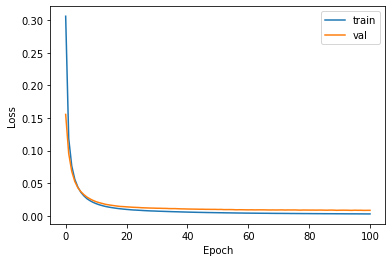

In [42]:
plt.plot(train_losses_tfc, label="train")
plt.plot(val_losses_tfc, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [50]:
accuracy_score((clf.predict(X_test_tfc) >= .5).astype(int), y_test_tfc)

0.9965